In [17]:
from utils import *

In [18]:
# Parámetros del modelo PDI
alpha = 0.05
lr = 0.001
T_burnin = 5
Csat = 2.0
KI = 1.0
ahead = 1
seasonal_period = 7

In [19]:
# Simular datos
n_series = 3
n_points = 60
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=n_points, freq="D")

data = []
for i in range(1, n_series + 1):
    key = f"SERIE_{i}"
    y_real = np.random.normal(100, 10, n_points)
    y_pred = y_real + np.random.normal(0, 10, n_points)
    future = [0] * int(n_points * 0.7) + [1] * int(n_points * 0.3)
    data.extend({
        "KEY": key,
        "FECHA": date,
        "Y": real if not fut else np.nan,
        "YHATFIN": pred,
        "FUTURE": fut,
        "YHAT_L": np.nan,
        "YHAT_U": np.nan,
    } for date, real, pred, fut in zip(dates, y_real, y_pred, future))

df = pd.DataFrame(data)

# Aplicar intervalos
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.3)
df_pdi = apply_pdi_with_calibration(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET"
)



  0%|          | 0/29 [00:00<?, ?it/s]c:\Users\Julian\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
100%|██████████| 29/29 [00:00<00:00, 95.00it/s] 
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\Julian\FCPDIHC\PDIHC\utils.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

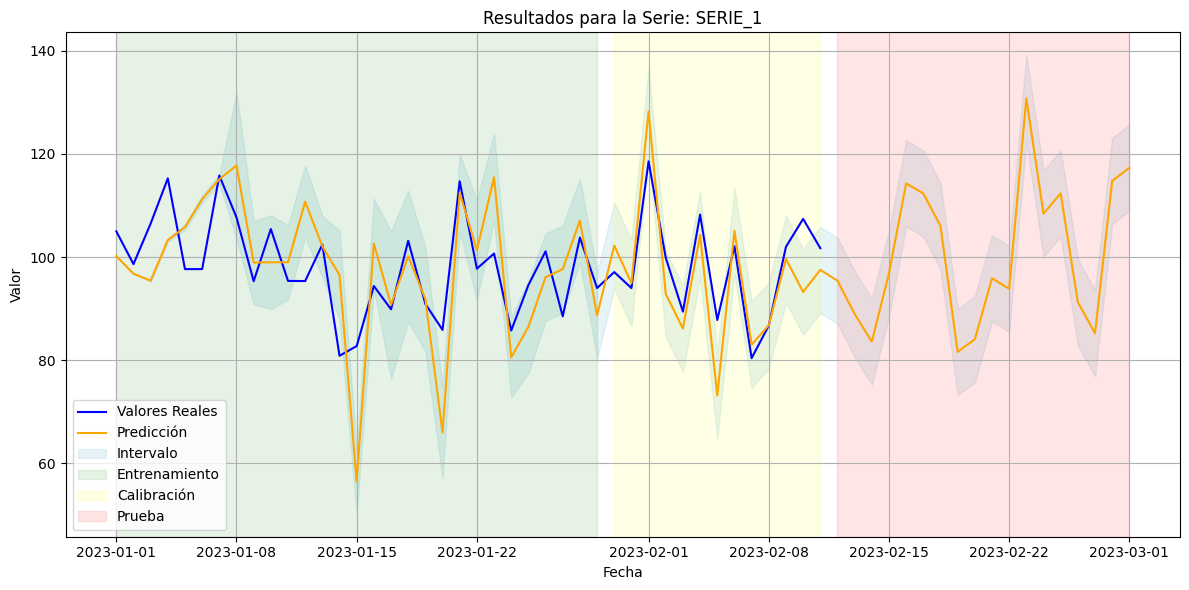

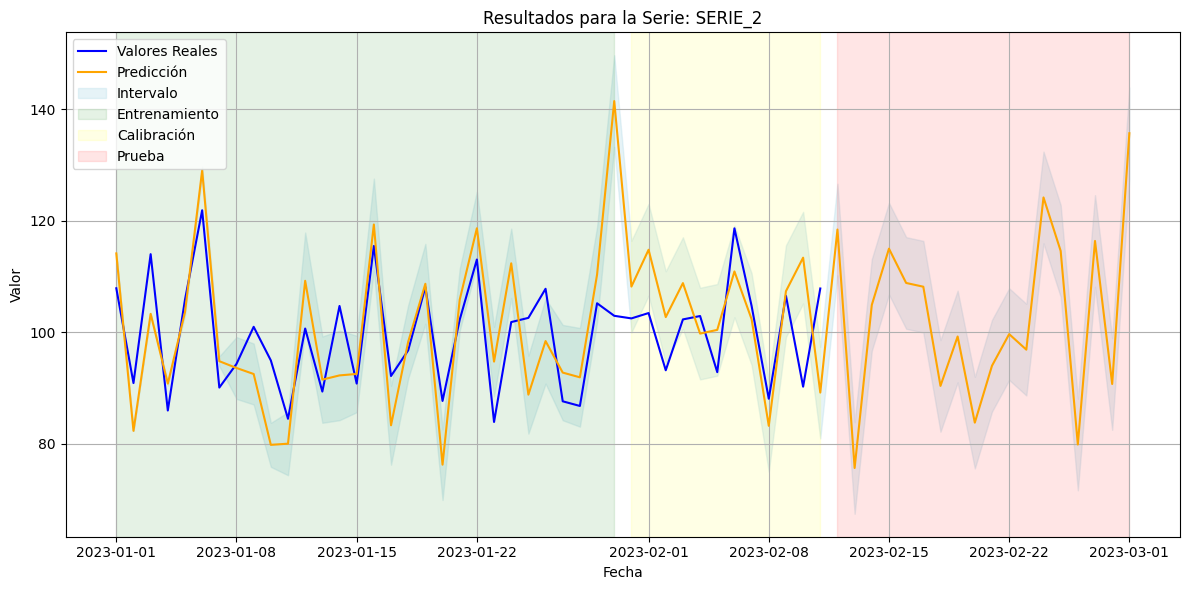

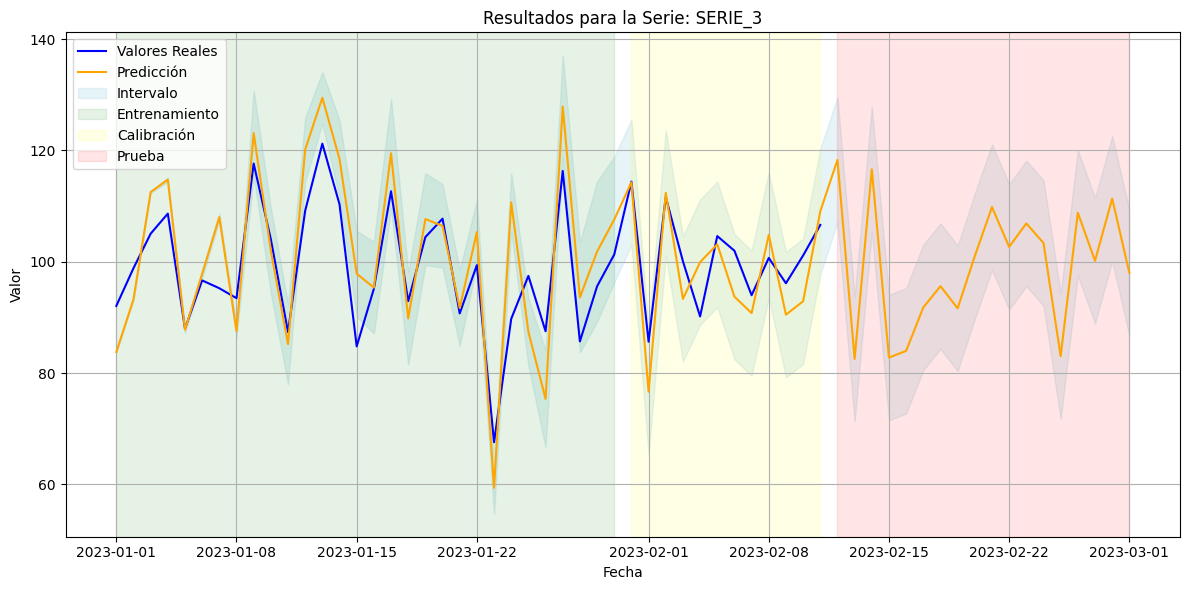

In [20]:
# Visualizar resultados para una serie
plot_series_results_with_sets(df_pdi, key="SERIE_1")

# Visualizar resultados para una serie
plot_series_results_with_sets(df_pdi, key="SERIE_2")

# Visualizar resultados para una serie
plot_series_results_with_sets(df_pdi, key="SERIE_3")

In [21]:
print(df_pdi.to_string())

         KEY      FECHA           Y     YHATFIN  FUTURE      YHAT_L      YHAT_U          SET
0    SERIE_1 2023-01-01  104.967142  100.175399       0  100.175399  100.175399        TRAIN
3    SERIE_1 2023-01-02   98.617357   96.760767       0   96.759817   96.761717        TRAIN
6    SERIE_1 2023-01-03  106.476885   95.413536       0   95.246460   95.580612        TRAIN
9    SERIE_1 2023-01-04  115.230299  103.268232       0  102.901850  103.634614        TRAIN
14   SERIE_1 2023-01-05   97.658466  105.783724       0  105.232874  106.334575        TRAIN
16   SERIE_1 2023-01-06   97.658630  111.221031       0  110.497663  111.944399        TRAIN
19   SERIE_1 2023-01-07  115.792128  115.072027       0  114.182137  115.961917        TRAIN
22   SERIE_1 2023-01-08  107.674347  117.709676       0  103.550596  131.868757        TRAIN
26   SERIE_1 2023-01-09   95.305256   98.921616       0   90.868917  106.974316        TRAIN
29   SERIE_1 2023-01-10  105.425600   98.974403       0   89.894490  1

In [22]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)

Métricas por KEY (Calibración):
       KEY  Marginal Coverage  Average Region Size  Conditional Coverage
0  SERIE_1           0.769231            16.669388              0.769231
1  SERIE_2           0.666667            16.435911              0.666667
2  SERIE_3           1.000000            22.524106              1.000000
